# The Ubiquity of Ubiquitous Computing💻
## Exploratory Data Analysis🔍
Mark Strathie  
[GitHub URL](https://github.com/markstrathie/data-analysis-portfolio) - Dec 2024

---

<table><tr>
<td><a href='https://unsplash.com/photos/a-woman-in-a-red-dress-wearing-a-virtual-reality-headset-A2BIY-TUjuA'><img src="img/vr_headset.jpg" alt="Woman wearing VR headset"/></a></td>
</tr></table>

<b><i>"...it is very possible that ... one machine would suffice to solve all the problems that are demanded of it from the whole country."</i></b>

This quote is from Sir Charles Darwin (grandson of the famous naturalist) who wrote this in 1946 ([source](https://plato.stanford.edu/entries/computing-history/)). He was well placed to make such a prediction as head of Britain's NPL (National Physical Laboratory) - where research into computers took place. Nevertheless, we all know now that this prediction was a massive understatement. Over the 78 years since Darwin's writing, people do not realise how much ICT has engulfed and transformed our day-to-day lives.

Ubiquitous computing or “ubicomp” is the idea of embedding computing into everyday objects to create seamless interactions ([source](https://doi.org/10.1145/159544.159617)). We now operate in this environment – where a smartphone wakes us up in the morning, we perform our work on a laptop, we access entertainment on our smart TV, and a smartwatch tells us when it’s time for bed. Far from one machine solving the problems of a country, we have many machines working for each person. How did we get here should we be concerned?

This project aims to use data from Ofcom, a UK government regulatory, to analyse the scope of ubicomp in the UK and its effect on our daily lives. We will analyse the use of technology across the UK in 2024. This will include the types of devices, how they are used, and how often.

- [Ofcom's Technology Tracker 16/07/2024](https://www.ofcom.org.uk/about-ofcom/our-research/statistical-release-calendar-2024-/)

At the end of out notebook we will hopefully draw some insights on how wrong Darwin was, how prevalent ubicomp now is, and how it shapes our daily habits without us even realising it.

We'll go through this project across 6 chapters:

1. Imports and reading data📖
2. Data Understanding☝
3. Data Preparation👷‍♂️
4. Feature Understanding📊
5. Feature Relationships👫
6. Asking questions about our Data🤷‍♂️

Let's get started!🙌

# 1. Imports and Reading Data📖

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#setting plot style
plt.style.use('ggplot')

#increasings max columns in pandas
pd.set_option('display.max_columns', None)

Let's read in the full dataset. We can conduct data cleaning and manipulation to remove the parts of the data that we don't need (as the data is pulled from a questionaire 48 pages long!).

In [2]:
df_tech = pd.read_excel('datasets/technology-tracker-2024-respondent-level-data.xlsx')

# 2. Data Understanding☝

In [3]:
df_tech.shape

(4000, 606)

In [4]:
df_tech.head()

,IOBS,WEIGHT,WEIGHTNEW,PCMosaicUK7Group,PCMosaicUK7Type,PCMosaicUK7GroupLabel,PCMosaicUK7TypeLabel,CABLE,SOURCE,REGION,LOCALE,METHOD,QZ1,QZ2,QZ2_BAND,QZ3,QZ4,QZ4_BAND,SEG,QZ6BND,QZ7A_1,QZ7A_2,QZ7A_3,QZ7A_4,QZ7A_5,QD1_1,QD1_2,QD1_3,QD1_4,QD1_5,QD1_6,QD1_7,QD1_8,QD1_9,QD1_10,QD1_11,QD1_12,QD2_1,QD2_2,QD2_3,QD2_4,QD2_5,QD2_6,QD2_7,QD2_8,QD2_9,QD2_10,QD2_11,QD2_12,QD2A,QD2A_DK,QD3_1,QD3_2,QD3_3,QD3_4,QD3_5,QD3_6,QD3_7,QD3_8,QD3_9,QD3_10,QD3_11,QD3_12,QD3_OTHER,QS1,QS2BND,QS3,QS4_1,QS4_2,QS4_3,QS4_4,QS4_5,QS5_1,QS5_2,QS5_3,QS5_4,QS5_5,QS5_6,QS5_7,QS5_8,QS5_9,QS5_10,QS5_OTHER,QS6_1,QS6_2,QS6_3,QS6_4,QS6_5,QS6_6,QS6_7,QS6_8,QS6_9,QS6_10,QS6_11,QS6_OTHER,QS7_1,QS7_2,QS7_3,QS7_4,QS7_5,QS7_6,QS7_7,QS7_8,QS7_9,QS7_10,QS7_11,QS7_12,QS7_13,QS7_14,QS7_15,QS7_16,QS7_17,QS7_OTHER,QS8_1,QS8_2,QS8_3,QS8_4,QS8_5,QS8_6,QS8_7,QS8_8,QS8_9,QS8_10,QS8_11,QS8_12,QS8_13,QS8_14,QS8_15,QS8_16,QS8_OTHER,QV1,QV2A_1,QV2A_2,QV2A_3,QV2A_4,QV2A_5,QV2A_6,QV2A_7,QV2A_8,QV2A_9,QV2A_10,QV2A_11,QV2A_12,QV2B_1,QV2B_2,QV2B_3,QV2B_4,QV2B_5,QV2B_6,QV2B_7,QV2B_8,QV2B_9,QV2B_10,QV2B_11,QV2B_12,QL1,QL2,QL3,QL3_OTHER,QL5,QM1,QM2,QM3,QM3_OTHER,QM4,QM4_OTHER,QM5,QM6,QM6_OTHER,QM7,QM8,QM9,QM10A,QM10B,QM11_1,QM11_2,QM11_3,QM11_4,QM11_5,QM11_6,QM11_7,QM11_8,QM11_9,QM11_10,QM11_11,QM12,QM13_1,QM13_2,QM13_3,QM13_4,QM13_5,QM13_6,QM13_7,QM13_OTHER,QE1,QE2,QE3_1,QE3_2,QE3_3,QE3_4,QE3_5,QE4_1,QE4_2,QE4_3,QE4_4,QE4_5,QE4_6,QE4_7,QE4_8,QE4_9,QE4_10,QE4_11,QE4_12,QE4_13,QE4_14,QE4_OTHER,QE5,QE6,QE7_1,QE7_2,QE7_3,QE7_4,QE7_5,QE7_6,QE7_OTHER,QE8,QE8_OTHER,E9_1_1,E9_1_2,E9_1_3,E9_1_4,E9_1_5,E9_2_1,E9_2_2,E9_2_3,E9_2_4,E9_2_5,E9_3_1,E9_3_2,E9_3_3,E9_3_4,E9_3_5,E9_4_1,E9_4_2,E9_4_3,E9_4_4,E9_4_5,E9_5_1,E9_5_2,E9_5_3,E9_5_4,E9_5_5,E9_6_1,E9_6_2,E9_6_3,E9_6_4,E9_6_5,E9_7_1,E9_7_2,E9_7_3,E9_7_4,E9_7_5,E9_8_1,E9_8_2,E9_8_3,E9_8_4,E9_8_5,E9_9_1,E9_9_2,E9_9_3,E9_9_4,E9_9_5,E9_10_1,E9_10_2,E9_10_3,E9_10_4,E9_10_5,E9_11_1,E9_11_2,E9_11_3,E9_11_4,E9_11_5,E9_12_1,E9_12_2,E9_12_3,E9_12_4,E9_12_5,E9_13_1,E9_13_2,E9_13_3,E9_13_4,E9_13_5,E9_14_1,E9_14_2,E9_14_3,E9_14_4,E9_14_5,E9_15_1,E9_15_2,E9_15_3,E9_15_4,E9_15_5,E9_16_1,E9_16_2,E9_16_3,E9_16_4,E9_16_5,E9_17_1,E9_17_2,E9_17_3,E9_17_4,E9_17_5,E9_18_1,E9_18_2,E9_18_3,E9_18_4,E9_18_5,E9_19_1,E9_19_2,E9_19_3,E9_19_4,E9_19_5,E9_20_1,E9_20_2,E9_20_3,E9_20_4,E9_20_5,E9_21_1,E9_21_2,E9_21_3,E9_21_4,E9_21_5,E9_22_1,E9_22_2,E9_22_3,E9_22_4,E9_22_5,E9_23_1,E9_23_2,E9_23_3,E9_23_4,E9_23_5,E9_24_1,E9_24_2,E9_24_3,E9_24_4,E9_24_5,E9_25_1,E9_25_2,E9_25_3,E9_25_4,E9_25_5,E9_26_1,E9_26_2,E9_26_3,E9_26_4,E9_26_5,E9_27_1,E9_27_2,E9_27_3,E9_27_4,E9_27_5,E9_28_1,E9_28_2,E9_28_3,E9_28_4,E9_28_5,E9_29_1,E9_29_2,E9_29_3,E9_29_4,E9_29_5,E9_30_1,E9_30_2,E9_30_3,E9_30_4,E9_30_5,E9_31_1,E9_31_2,E9_31_3,E9_31_4,E9_31_5,E9_32_1,E9_32_2,E9_32_3,E9_32_4,E9_32_5,QM15_1,QM15_2,QM15_3,QM15_4,QM15_5,QM15_6,QM15_7,QM15_8,QM15_9,QM15_10,QM15_11,QM15_12,QM15_13,QM15_14,QM15_15,QM15_16,QM15_17,QE10_1,QE10_2,QE10_3,QE10_4,QE10_5,QE10_6,QE10_7,QE10_8,QE10_9,QE10_10,QE10_11,QE10_12,QE10_13,QE10_OTHER,QE11_1,QE11_2,QE11_3,QE11_4,QE11_5,QE12,QE13,QE14_1,QE14_2,QE14_3,QE14_4,QE14_5,QE14_6,QE15,QE16_1,QE16_2,QE16_3,QE16_4,QE16_5,QE16_6,QE16_7,QE16_8,QE16_9,QE16_10,QE16_11,QE16_12,QE16_13,QE16_14,QE16_15,QE16_16,QE16_17,QE16_OTHER,QE17,QE18_1,QE18_2,QE18_3,QE18_4,QE18_5,QE18_6,QE18_7,QE18_8,QE18_9,QE18_10,QE18_11,QE18_12,QE18_13,QE18_14,QE18_15,QE18_16,QE18_OTHER,QE19,QE20_1,QE20_2,QE20_3,QE20_4,QE20_5,QE20_6,QE20_7,QE20_OTHER,QR1,QR1_BAND,QR2,QR2_BAND,QR3_1,QR3_2,QR3_3,QR3_4,QR3_5,QR3_6,QR3_7,QR3_8,QR3_9,QR4_1,QR4_2,QR4_3,QR4_4,QR4_5,QR4_6,QR4_7,QR4_8,QR4_9,QR5_1,QR5_2,QR5_3,QR5_4,QR5_5,QR6_1,QR6_2,QR6_3,QR6_4,QR6_5,QR6_6,QR6_7,QR6_8,QR6_9,QR6_10,QR6_11,QR7,QR8,QT1,QT2,QT3_1,QT3_2,QT3_3,QT3_4,QT3_5,QT3_6,QT3_7,QT3_8,QT4,QT5_1,QT5_2,QT5_3,QT5_4,QT5_5,QT5_6,QT5_7,QT5_8,QT5_9,QT5_10,QT5_11,QT5_12,QT5_13,QT5_14,QT5_OTHER,QT6_1,QT6_2,QT6_3,QT6_4,QT6_5,QT6_6,QT6_7,QT6_8,QT6_9,QT6_10,QT6_11,QT6_12,QT6_13,QT6_OTHER,QT7_1,QT7_2,QT7_3,QT7_4,QT7_5,QT7_6,QT7_7,QT7_8,QT7_9,QT7_10,QT7_OTHER,QT8_1,QT8_2,QT8_3,QT8

Our tech data is contains 4000 rows, which matches the 4000 people from the UK that were interviewed. Each row has 606 columns of data that corresponds to their answers given in Ofcom's questionaire. We will need to use the questionaire as a data dictionary to understand what the entires in each column mean. QD1_10, etc.

In [5]:
print(df_tech.columns.tolist())

['IOBS', 'WEIGHT', 'WEIGHTNEW', 'PCMosaicUK7Group', 'PCMosaicUK7Type', 'PCMosaicUK7GroupLabel', 'PCMosaicUK7TypeLabel', 'CABLE', 'SOURCE', 'REGION', 'LOCALE', 'METHOD', 'QZ1', 'QZ2', 'QZ2_BAND', 'QZ3', 'QZ4', 'QZ4_BAND', 'SEG', 'QZ6BND', 'QZ7A_1', 'QZ7A_2', 'QZ7A_3', 'QZ7A_4', 'QZ7A_5', 'QD1_1', 'QD1_2', 'QD1_3', 'QD1_4', 'QD1_5', 'QD1_6', 'QD1_7', 'QD1_8', 'QD1_9', 'QD1_10', 'QD1_11', 'QD1_12', 'QD2_1', 'QD2_2', 'QD2_3', 'QD2_4', 'QD2_5', 'QD2_6', 'QD2_7', 'QD2_8', 'QD2_9', 'QD2_10', 'QD2_11', 'QD2_12', 'QD2A', 'QD2A_DK', 'QD3_1', 'QD3_2', 'QD3_3', 'QD3_4', 'QD3_5', 'QD3_6', 'QD3_7', 'QD3_8', 'QD3_9', 'QD3_10', 'QD3_11', 'QD3_12', 'QD3_OTHER', 'QS1', 'QS2BND', 'QS3', 'QS4_1', 'QS4_2', 'QS4_3', 'QS4_4', 'QS4_5', 'QS5_1', 'QS5_2', 'QS5_3', 'QS5_4', 'QS5_5', 'QS5_6', 'QS5_7', 'QS5_8', 'QS5_9', 'QS5_10', 'QS5_OTHER', 'QS6_1', 'QS6_2', 'QS6_3', 'QS6_4', 'QS6_5', 'QS6_6', 'QS6_7', 'QS6_8', 'QS6_9', 'QS6_10', 'QS6_11', 'QS6_OTHER', 'QS7_1', 'QS7_2', 'QS7_3', 'QS7_4', 'QS7_5', 'QS7_6', 'QS7_7

We can drop the columns later that we don't wish to use in our analysis.

In [6]:
df_tech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 606 entries, IOBS to QZ14
dtypes: float64(286), int64(292), object(28)
memory usage: 18.5+ MB


We will perform further data validation in the next step by checking the percentage of null values for certain columns we are interested in. This is important as some questions may not be answered or recorded correctly. However, as the data has been officially released by a government regulatory, we can trust it is likely to be high quality.

In [7]:
df_tech.describe()

,IOBS,WEIGHT,WEIGHTNEW,PCMosaicUK7Type,CABLE,SOURCE,REGION,LOCALE,METHOD,QZ1,QZ2,QZ2_BAND,QZ3,QZ4,QZ4_BAND,SEG,QZ6BND,QZ7A_1,QZ7A_2,QZ7A_3,QZ7A_4,QZ7A_5,QD1_1,QD1_2,QD1_3,QD1_4,QD1_5,QD1_6,QD1_7,QD1_8,QD1_9,QD1_10,QD1_11,QD1_12,QD2_1,QD2_2,QD2_3,QD2_4,QD2_5,QD2_6,QD2_7,QD2_8,QD2_9,QD2_10,QD2_11,QD2_12,QD2A_DK,QD3_1,QD3_2,QD3_3,QD3_4,QD3_5,QD3_6,QD3_7,QD3_8,QD3_9,QD3_10,QD3_11,QD3_12,QS1,QS2BND,QS3,QS4_1,QS4_2,QS4_3,QS4_4,QS4_5,QS5_1,QS5_2,QS5_3,QS5_4,QS5_5,QS5_6,QS5_7,QS5_8,QS5_9,QS5_10,QS6_1,QS6_2,QS6_3,QS6_4,QS6_5,QS6_6,QS6_7,QS6_8,QS6_9,QS6_10,QS6_11,QS7_1,QS7_2,QS7_3,QS7_4,QS7_5,QS7_6,QS7_7,QS7_8,QS7_9,QS7_10,QS7_11,QS7_12,QS7_13,QS7_14,QS7_15,QS7_16,QS7_17,QS8_1,QS8_2,QS8_3,QS8_4,QS8_5,QS8_6,QS8_7,QS8_8,QS8_9,QS8_10,QS8_11,QS8_12,QS8_13,QS8_14,QS8_15,QS8_16,QV1,QV2A_1,QV2A_2,QV2A_3,QV2A_4,QV2A_5,QV2A_6,QV2A_7,QV2A_8,QV2A_9,QV2A_10,QV2A_11,QV2A_12,QV2B_1,QV2B_2,QV2B_3,QV2B_4,QV2B_5,QV2B_6,QV2B_7,QV2B_8,QV2B_9,QV2B_10,QV2B_11,QV2B_12,QL1,QL2,QL3,QL5,QM1,QM2,QM3,QM4,QM5,QM6,QM7,QM8,QM9,QM10A,QM10B,QM11_1,QM11_2,QM11_3,QM11_4,QM11_5,QM11_6,QM11_7,QM11_8,QM11_9,QM11_10,QM11_11,QM12,QM13_1,QM13_2,QM13_3,QM13_4,QM13_5,QM13_6,QM13_7,QE1,QE2,QE3_1,QE3_2,QE3_3,QE3_4,QE3_5,QE4_1,QE4_2,QE4_3,QE4_4,QE4_5,QE4_6,QE4_7,QE4_8,QE4_9,QE4_10,QE4_11,QE4_12,QE4_13,QE4_14,QE5,QE6,QE7_1,QE7_2,QE7_3,QE7_4,QE7_5,QE7_6,QE8,E9_1_1,E9_1_2,E9_1_3,E9_1_4,E9_1_5,E9_2_1,E9_2_2,E9_2_3,E9_2_4,E9_2_5,E9_3_1,E9_3_2,E9_3_3,E9_3_4,E9_3_5,E9_4_1,E9_4_2,E9_4_3,E9_4_4,E9_4_5,E9_5_1,E9_5_2,E9_5_3,E9_5_4,E9_5_5,E9_6_1,E9_6_2,E9_6_3,E9_6_4,E9_6_5,E9_7_1,E9_7_2,E9_7_3,E9_7_4,E9_7_5,E9_8_1,E9_8_2,E9_8_3,E9_8_4,E9_8_5,E9_9_1,E9_9_2,E9_9_3,E9_9_4,E9_9_5,E9_10_1,E9_10_2,E9_10_3,E9_10_4,E9_10_5,E9_11_1,E9_11_2,E9_11_3,E9_11_4,E9_11_5,E9_12_1,E9_12_2,E9_12_3,E9_12_4,E9_12_5,E9_13_1,E9_13_2,E9_13_3,E9_13_4,E9_13_5,E9_14_1,E9_14_2,E9_14_3,E9_14_4,E9_14_5,E9_15_1,E9_15_2,E9_15_3,E9_15_4,E9_15_5,E9_16_1,E9_16_2,E9_16_3,E9_16_4,E9_16_5,E9_17_1,E9_17_2,E9_17_3,E9_17_4,E9_17_5,E9_18_1,E9_18_2,E9_18_3,E9_18_4,E9_18_5,E9_19_1,E9_19_2,E9_19_3,E9_19_4,E9_19_5,E9_20_1,E9_20_2,E9_20_3,E9_20_4,E9_20_5,E9_21_1,E9_21_2,E9_21_3,E9_21_4,E9_21_5,E9_22_1,E9_22_2,E9_22_3,E9_22_4,E9_22_5,E9_23_1,E9_23_2,E9_23_3,E9_23_4,E9_23_5,E9_24_1,E9_24_2,E9_24_3,E9_24_4,E9_24_5,E9_25_1,E9_25_2,E9_25_3,E9_25_4,E9_25_5,E9_26_1,E9_26_2,E9_26_3,E9_26_4,E9_26_5,E9_27_1,E9_27_2,E9_27_3,E9_27_4,E9_27_5,E9_28_1,E9_28_2,E9_28_3,E9_28_4,E9_28_5,E9_29_1,E9_29_2,E9_29_3,E9_29_4,E9_29_5,E9_30_1,E9_30_2,E9_30_3,E9_30_4,E9_30_5,E9_31_1,E9_31_2,E9_31_3,E9_31_4,E9_31_5,E9_32_1,E9_32_2,E9_32_3,E9_32_4,E9_32_5,QM15_1,QM15_2,QM15_3,QM15_4,QM15_5,QM15_6,QM15_7,QM15_8,QM15_9,QM15_10,QM15_11,QM15_12,QM15_13,QM15_14,QM15_15,QM15_16,QM15_17,QE10_1,QE10_2,QE10_3,QE10_4,QE10_5,QE10_6,QE10_7,QE10_8,QE10_9,QE10_10,QE10_11,QE10_12,QE10_13,QE11_1,QE11_2,QE11_3,QE11_4,QE11_5,QE12,QE13,QE14_1,QE14_2,QE14_3,QE14_4,QE14_5,QE14_6,QE15,QE16_1,QE16_2,QE16_3,QE16_4,QE16_5,QE16_6,QE16_7,QE16_8,QE16_9,QE16_10,QE16_11,QE16_12,QE16_13,QE16_14,QE16_15,QE16_16,QE16_17,QE17,QE18_1,QE18_2,QE18_3,QE18_4,QE18_5,QE18_6,QE18_7,QE18_8,QE18_9,QE18_10,QE18_11,QE18_12,QE18_13,QE18_14,QE18_15,QE18_16,QE19,QE20_1,QE20_2,QE20_3,QE20_4,QE20_5,QE20_6,QE20_7,QR1,QR1_BAND,QR2,QR2_BAND,QR3_1,QR3_2,QR3_3,QR3_4,QR3_5,QR3_6,QR3_7,QR3_8,QR3_9,QR4_1,QR4_2,QR4_3,QR4_4,QR4_5,QR4_6,QR4_7,QR4_8,QR4_9,QR5_1,QR5_2,QR5_3,QR5_4,QR5_5,QR6_1,QR6_2,QR6_3,QR6_4,QR6_5,QR6_6,QR6_7,QR6_8,QR6_9,QR6_10,QR6_11,QR7,QR8,QT1,QT2,QT3_1,QT3_2,QT3_3,QT3_4,QT3_5,QT3_6,QT3_7,QT3_8,QT4,QT5_1,QT5_2,QT5_3,QT5_4,QT5_5,QT5_6,QT5_7,QT5_8,QT5_9,QT5_10,QT5_11,QT5_12,QT5_13,QT5_14,QT6_1,QT6_2,QT6_3,QT6_4,QT6_5,QT6_6,QT6_7,QT6_8,QT6_9,QT6_10,QT6_11,QT6_12,QT6_13,QT7_1,QT7_2,QT7_3,QT7_4,QT7_5,QT7_6,QT7_7,QT7_8,QT7_9,QT7_10,QT8_1,QT8_2,QT8_3,QT8_4,QZ8,QZ9_1,QZ9_2,QZ9_3,QZ9_4,QZ9_5,QZ9_6,QZ9_7,QZ9_8,QZ9_9,QZ9_10,QZ9_11,QZ10,QZ11,QZ12,QZ13_1,QZ13_2,QZ13_3,QZ13_4,QZ13_5,QZ13_6,QZ13_7,QZ13_8,QZ13_9,QZ13_10,QZ13_11,QZ13_12,QZ13_13,QZ13_14,QZ14
count,4000.000000,4000.000000,4000.000000,3820.000000,4000.000000,4000.0

Some interesting demographic data:

QZ2 is interviewee's age. We can see that the mean age was 48. The minimum age was 16 and the maximum was 96.

QZ4 is the number of people living in a single household. Mean is 3 people. Minimum is 1 and maximum is 13!

# 3. Data Preperation👷‍♂️

- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming columns

Creating our data dictionary based on the questionnaire used by Ofcom which you can access [here](https://www.ofcom.org.uk/siteassets/resources/documents/research-and-data/data/statistics/2024/technology-tracker/technology-tracker-2024-questionnaire.pdf?v=370270).

- We understand that the <code>WEIGHTNEW</code> column weighs the results in order to better represent the whole of the UK population. So we will retain this column.
- The next columns are demographic details. We are going to focus on sex and age for our analysis. <code>QZ1</code> represents sex (<code>1</code> for Man and <code>2</code> for Women), <code>QZ2</code> represents age, and <code>QZ2_BAND</code> represents what age band the householder is in.
- Question set <code>QD1_1-11</code> is regarding device ownership. We will rename these to be device flags. The data simply records a <code>1</code> or <code>0</code> to show if the device is owned or not by the householder.
- <code>QS1</code> is a column that shows smart speaker ownership. <code>1</code> mean yes and is used personally, <code>2</code> means yes but not used personally, <code>3</code> means no, <code>4</code> means don't know.
- <code>QS8_1-14</code> shows further smart device ownership. We have turned these into flags similar to questions under the <code>QD1</code> set.
- <code>QV1</code> records car use per household, which we need to use to find the percentage of cars that offer smart infotainment systems. This is <code>1</code> for yes I use as a driver, and <code>2</code> for using as a passenger, <code>3</code> for have a car in the household but don't use, and <code>4</code> for no car.
- <code>QV2A_3</code> shows, out of those who use a car, if the car has a smart infotainment system. This is a flag for contains one or not.
- <code>QM2</code> records who has and uses a smartphone. <code>1</code> shows a user, <code>2</code> shows an owner but not a user, <code>3</code> is no, <code>4</code> is don't know.
- <code>QM5</code> shows, out of smartphone users, who has access to the internet. <code>1</code> is yes 5G, <code>2</code> is 4G, <code>3</code> means No internet, <code>4</code> means don't know.
- <code>QE1</code> records who has access to internet at home. <code>1</code> means yes and it is used, <code>2</code> is for yes and don't use, <code>3</code> is no, <code>4</code> is don't know.
- <code>QE4_1-13</code> records internet use outside the home. It provides options such as work, school, cafes, etc. These are flags as in <code>QD1</code>.
- <code>QE6</code> records, out of home or outside internet users, how many hours they spend per week online. <code>1</code> means 0 hours, and they progress in bands up to <code>8</code> which is over 50 hours. <code>9</code> means unsure.

Some of the response allow the householders to select 'other' and write in an answer. For the purposes of simplicity we have ignored these, as they will not make up a significant portion of the population.

In [8]:
# Renaming columns
df_tech = df_tech.rename(columns={
            #demographics
            'QZ1':'sex', 'QZ2':'age', 'QZ2_BAND':'age_band', 
            #QD1 devices
            'QD1_1':'pc_flag', 'QD1_2':'laptop_flag', 'QD1_3':'tablet_flag', 'QD1_4':'console_flag', 
            'QD1_5':'smart_tv_flag', 'QD1_6':'ipod_flag', 'QD1_7':'kindle_flag', 'QD1_8':'dvd_flag', 
            'QD1_9':'smart_watch_flag', 'QD1_10':'vr_flag', 'QD1_11':'QD1_none_flag', 
            #QS1 smart speaker
            'QS1':'smart_speaker', 
            #QS8 smart devices
            'QS8_1':'smart_doorbell_flag', 'QS8_2':'smart_tracker_flag', 'QS8_3':'smart_scales_flag', 
            'QS8_4':'smart_baby_flag', 'QS8_5':'smart_lighting_flag', 'QS8_6':'smart_smoke_flag', 
            'QS8_7':'smart_appliance_flag', 'QS8_8':'smart_robots_flag', 'QS8_9':'smart_plug_flag', 
            'QS8_10':'smart_fitness_flag', 'QS8_12':'QS8_none_flag', 'QS8_14':'smart_alarm_flag', 
            #QV1 and QV2A car and smart car flag
            'QV1':'car', 'QV2A_3':'smart_car_flag',
            #QM2 and QM5 smartphone and internet
            'QM2':'smartphone', 'QM5':'smartphone_internet', 
            #QE1 internet home
            'QE1':'internet_home', 
            #QE4 internet outside
            'QE4_1':'internet_work', 'QE4_2':'internet_school', 'QE4_3':'internet_library', 
            'QE4_4':'internet_learning_centre', 'QE4_5':'internet_cafe', 'QE4_6':'internet_other_home', 
            'QE4_7':'internet_travelling', 'QE4_8':'internet_restaurants', 'QE4_9':'internet_shops', 
            'QE4_10':'internet_gym', 'QE4_11':'internet_parks', 'QE4_13':'internet_none', 
            #QE6 internet hours per week
            'QE6':'internet_hours_per_week'}).copy()

# Dropping excess columns
df_tech = df_tech[[#'IOBS', 'WEIGHT',
            'WEIGHTNEW',
            #'PCMosaicUK7Group', 'PCMosaicUK7Type', 'PCMosaicUK7GroupLabel', 'PCMosaicUK7TypeLabel', 'CABLE', 
            # 'SOURCE', 'REGION', 'LOCALE', 'METHOD', 
            'sex', 'age', 'age_band', 
            #'QZ3', 'QZ4', 'QZ4_BAND', 'SEG', 'QZ6BND', 'QZ7A_1', 'QZ7A_2', 'QZ7A_3', 'QZ7A_4', 'QZ7A_5', 
            'pc_flag', 'laptop_flag', 'tablet_flag', 'console_flag', 'smart_tv_flag', 'ipod_flag', 
            'kindle_flag', 'dvd_flag', 'smart_watch_flag', 'vr_flag', 'QD1_none_flag', 
            'smart_speaker', 
            'smart_doorbell_flag', 'smart_tracker_flag', 'smart_scales_flag', 'smart_baby_flag', 'smart_lighting_flag', 
            'smart_smoke_flag', 'smart_appliance_flag', 'smart_robots_flag', 'smart_plug_flag', 'smart_fitness_flag', 
            'QS8_none_flag', 'smart_alarm_flag', 
            'car', 'smart_car_flag', 
            'smartphone', 'smartphone_internet',
            'internet_home',
            'internet_work', 'internet_school', 'internet_library', 
            'internet_learning_centre', 'internet_cafe', 'internet_other_home', 
            'internet_travelling', 'internet_restaurants', 'internet_shops', 
            'internet_gym', 'internet_parks', 'internet_none', 
            'internet_hours_per_week'
            #'QD2A', 'QD2A_DK', 'QD3_1', 'QD3_2', 'QD3_3', 'QD3_4', 'QD3_5', 'QD3_6', 'QD3_7', 'QD3_8', 'QD3_9', 
            # 'QD3_10', 'QD3_11', 'QD3_12', 'QD3_OTHER', 'QS1', 'QS2BND', 'QS3', 'QS4_1', 'QS4_2', 'QS4_3', 
            # 'QS4_4', 'QS4_5', 'QS5_1', 'QS5_2', 'QS5_3', 'QS5_4', 'QS5_5', 'QS5_6', 'QS5_7', 'QS5_8', 'QS5_9', 
            # 'QS5_10', 'QS5_OTHER', 'QS6_1', 'QS6_2', 'QS6_3', 'QS6_4', 'QS6_5', 'QS6_6', 'QS6_7', 'QS6_8', 
            # 'QS6_9', 'QS6_10', 'QS6_11', 'QS6_OTHER', 'QS7_1', 'QS7_2', 'QS7_3', 'QS7_4', 'QS7_5', 'QS7_6', 
            # 'QS7_7', 'QS7_8', 'QS7_9', 'QS7_10', 'QS7_11', 'QS7_12', 'QS7_13', 'QS7_14', 'QS7_15', 'QS7_16', 
            # 'QS7_17', 'QS7_OTHER', 'QS8_1', 'QS8_2', 'QS8_3', 'QS8_4', 'QS8_5', 'QS8_6', 'QS8_7', 'QS8_8', 
            # 'QS8_9', 'QS8_10', 'QS8_11', 'QS8_12', 'QS8_13', 'QS8_14', 'QS8_15', 'QS8_16', 'QS8_OTHER', 'QV1', 
            # 'QV2A_1', 'QV2A_2', 'QV2A_3', 'QV2A_4', 'QV2A_5', 'QV2A_6', 'QV2A_7', 'QV2A_8', 'QV2A_9', 'QV2A_10', 
            # 'QV2A_11', 'QV2A_12', 'QV2B_1', 'QV2B_2', 'QV2B_3', 'QV2B_4', 'QV2B_5', 'QV2B_6', 'QV2B_7', 'QV2B_8', 
            # 'QV2B_9', 'QV2B_10', 'QV2B_11', 'QV2B_12', 'QL1', 'QL2', 'QL3', 'QL3_OTHER', 'QL5', 'QM1', 'QM2', 
            # 'QM3', 'QM3_OTHER', 'QM4', 'QM4_OTHER', 'QM5', 'QM6', 'QM6_OTHER', 'QM7', 'QM8', 'QM9', 'QM10A', 
            # 'QM10B', 'QM11_1', 'QM11_2', 'QM11_3', 'QM11_4', 'QM11_5', 'QM11_6', 'QM11_7', 'QM11_8', 'QM11_9', 
            # 'QM11_10', 'QM11_11', 'QM12', 'QM13_1', 'QM13_2', 'QM13_3', 'QM13_4', 'QM13_5', 'QM13_6', 'QM13_7', 
            # 'QM13_OTHER', 'QE1', 'QE2', 'QE3_1', 'QE3_2', 'QE3_3', 'QE3_4', 'QE3_5', 'QE4_1', 'QE4_2', 'QE4_3', 
            # 'QE4_4', 'QE4_5', 'QE4_6', 'QE4_7', 'QE4_8', 'QE4_9', 'QE4_10', 'QE4_11', 'QE4_12', 'QE4_13', 
            # 'QE4_14', 'QE4_OTHER', 'QE5', 'QE6', 'QE7_1', 'QE7_2', 'QE7_3', 'QE7_4', 'QE7_5', 'QE7_6', 'QE7_OTHER', 
            # 'QE8', 'QE8_OTHER', 'E9_1_1', 'E9_1_2', 'E9_1_3', 'E9_1_4', 'E9_1_5', 'E9_2_1', 'E9_2_2', 'E9_2_3', 
            # 'E9_2_4', 'E9_2_5', 'E9_3_1', 'E9_3_2', 'E9_3_3', 'E9_3_4', 'E9_3_5', 'E9_4_1', 'E9_4_2', 'E9_4_3', 
            # 'E9_4_4', 'E9_4_5', 'E9_5_1', 'E9_5_2', 'E9_5_3', 'E9_5_4', 'E9_5_5', 'E9_6_1', 'E9_6_2', 'E9_6_3', 
            # 'E9_6_4', 'E9_6_5', 'E9_7_1', 'E9_7_2', 'E9_7_3', 'E9_7_4', 'E9_7_5', 'E9_8_1', 'E9_8_2', 'E9_8_3', 
            # 'E9_8_4', 'E9_8_5', 'E9_9_1', 'E9_9_2', 'E9_9_3', 'E9_9_4', 'E9_9_5', 'E9_10_1', 'E9_10_2', 'E9_10_3', 
            # 'E9_10_4', 'E9_10_5', 'E9_11_1', 'E9_11_2', 'E9_11_3', 'E9_11_4', 'E9_11_5', 'E9_12_1', 'E9_12_2', 
            # 'E9_12_3', 'E9_12_4', 'E9_12_5', 'E9_13_1', 'E9_13_2', 'E9_13_3', 'E9_13_4', 'E9_13_5', 'E9_14_1', 
            # 'E9_14_2', 'E9_14_3', 'E9_14_4', 'E9_14_5', 'E9_15_1', 'E9_15_2', 'E9_15_3', 'E9_15_4', 'E9_15_5', 
            # 'E9_16_1', 'E9_16_2', 'E9_16_3', 'E9_16_4', 'E9_16_5', 'E9_17_1', 'E9_17_2', 'E9_17_3', 'E9_17_4', 
            # 'E9_17_5', 'E9_18_1', 'E9_18_2', 'E9_18_3', 'E9_18_4', 'E9_18_5', 'E9_19_1', 'E9_19_2', 'E9_19_3', 
            # 'E9_19_4', 'E9_19_5', 'E9_20_1', 'E9_20_2', 'E9_20_3', 'E9_20_4', 'E9_20_5', 'E9_21_1', 'E9_21_2', 
            # 'E9_21_3', 'E9_21_4', 'E9_21_5', 'E9_22_1', 'E9_22_2', 'E9_22_3', 'E9_22_4', 'E9_22_5', 'E9_23_1', 
            # 'E9_23_2', 'E9_23_3', 'E9_23_4', 'E9_23_5', 'E9_24_1', 'E9_24_2', 'E9_24_3', 'E9_24_4', 'E9_24_5', 
            # 'E9_25_1', 'E9_25_2', 'E9_25_3', 'E9_25_4', 'E9_25_5', 'E9_26_1', 'E9_26_2', 'E9_26_3', 'E9_26_4', 
            # 'E9_26_5', 'E9_27_1', 'E9_27_2', 'E9_27_3', 'E9_27_4', 'E9_27_5', 'E9_28_1', 'E9_28_2', 'E9_28_3', 
            # 'E9_28_4', 'E9_28_5', 'E9_29_1', 'E9_29_2', 'E9_29_3', 'E9_29_4', 'E9_29_5', 'E9_30_1', 'E9_30_2', 
            # 'E9_30_3', 'E9_30_4', 'E9_30_5', 'E9_31_1', 'E9_31_2', 'E9_31_3', 'E9_31_4', 'E9_31_5', 'E9_32_1', 
            # 'E9_32_2', 'E9_32_3', 'E9_32_4', 'E9_32_5', 'QM15_1', 'QM15_2', 'QM15_3', 'QM15_4', 'QM15_5', 'QM15_6', 
            # 'QM15_7', 'QM15_8', 'QM15_9', 'QM15_10', 'QM15_11', 'QM15_12', 'QM15_13', 'QM15_14', 'QM15_15', 'QM15_16', 
            # 'QM15_17', 'QE10_1', 'QE10_2', 'QE10_3', 'QE10_4', 'QE10_5', 'QE10_6', 'QE10_7', 'QE10_8', 'QE10_9', 
            # 'QE10_10', 'QE10_11', 'QE10_12', 'QE10_13', 'QE10_OTHER', 'QE11_1', 'QE11_2', 'QE11_3', 'QE11_4', 
            # 'QE11_5', 'QE12', 'QE13', 'QE14_1', 'QE14_2', 'QE14_3', 'QE14_4', 'QE14_5', 'QE14_6', 'QE15', 'QE16_1', 
            # 'QE16_2', 'QE16_3', 'QE16_4', 'QE16_5', 'QE16_6', 'QE16_7', 'QE16_8', 'QE16_9', 'QE16_10', 'QE16_11', 
            # 'QE16_12', 'QE16_13', 'QE16_14', 'QE16_15', 'QE16_16', 'QE16_17', 'QE16_OTHER', 'QE17', 'QE18_1', 'QE18_2', 
            # 'QE18_3', 'QE18_4', 'QE18_5', 'QE18_6', 'QE18_7', 'QE18_8', 'QE18_9', 'QE18_10', 'QE18_11', 'QE18_12', 
            # 'QE18_13', 'QE18_14', 'QE18_15', 'QE18_16', 'QE18_OTHER', 'QE19', 'QE20_1', 'QE20_2', 'QE20_3', 'QE20_4', 
            # 'QE20_5', 'QE20_6', 'QE20_7', 'QE20_OTHER', 'QR1', 'QR1_BAND', 'QR2', 'QR2_BAND', 'QR3_1', 'QR3_2', 'QR3_3', 
            # 'QR3_4', 'QR3_5', 'QR3_6', 'QR3_7', 'QR3_8', 'QR3_9', 'QR4_1', 'QR4_2', 'QR4_3', 'QR4_4', 'QR4_5', 'QR4_6', 
            # 'QR4_7', 'QR4_8', 'QR4_9', 'QR5_1', 'QR5_2', 'QR5_3', 'QR5_4', 'QR5_5', 'QR6_1', 'QR6_2', 'QR6_3', 'QR6_4', 
            # 'QR6_5', 'QR6_6', 'QR6_7', 'QR6_8', 'QR6_9', 'QR6_10', 'QR6_11', 'QR7', 'QR8', 'QT1', 'QT2', 'QT3_1', 
            # 'QT3_2', 'QT3_3', 'QT3_4', 'QT3_5', 'QT3_6', 'QT3_7', 'QT3_8', 'QT4', 'QT5_1', 'QT5_2', 'QT5_3', 'QT5_4', 
            # 'QT5_5', 'QT5_6', 'QT5_7', 'QT5_8', 'QT5_9', 'QT5_10', 'QT5_11', 'QT5_12', 'QT5_13', 'QT5_14', 'QT5_OTHER', 
            # 'QT6_1', 'QT6_2', 'QT6_3', 'QT6_4', 'QT6_5', 'QT6_6', 'QT6_7', 'QT6_8', 'QT6_9', 'QT6_10', 'QT6_11', 'QT6_12', 
            # 'QT6_13', 'QT6_OTHER', 'QT7_1', 'QT7_2', 'QT7_3', 'QT7_4', 'QT7_5', 'QT7_6', 'QT7_7', 'QT7_8', 'QT7_9', 
            # 'QT7_10', 'QT7_OTHER', 'QT8_1', 'QT8_2', 'QT8_3', 'QT8_4', 'QZ8', 'QZ8_OTHER', 'QZ9_1', 'QZ9_2', 'QZ9_3', 
            # 'QZ9_4', 'QZ9_5', 'QZ9_6', 'QZ9_7', 'QZ9_8', 'QZ9_9', 'QZ9_10', 'QZ9_11', 'QZ9_OTHER', 'QZ10', 'QZ11', 
            # 'QZ11_OTHER', 'QZ12', 'QZ13_1', 'QZ13_2', 'QZ13_3', 'QZ13_4', 'QZ13_5', 'QZ13_6', 'QZ13_7', 'QZ13_8', 'QZ13_9', 
            # 'QZ13_10', 'QZ13_11', 'QZ13_12', 'QZ13_13', 'QZ13_14', 'QZ13_OTHER', 'QZ14'
            ]].copy()

Checking for null values:

In [9]:
df_tech.isna().sum()

WEIGHTNEW                     0
sex                           0
age                           2
age_band                      0
pc_flag                       0
laptop_flag                   0
tablet_flag                   0
console_flag                  0
smart_tv_flag                 0
ipod_flag                     0
kindle_flag                   0
dvd_flag                      0
smart_watch_flag              0
vr_flag                       0
QD1_none_flag                 0
smart_speaker                 0
smart_doorbell_flag           0
smart_tracker_flag            0
smart_scales_flag             0
smart_baby_flag               0
smart_lighting_flag           0
smart_smoke_flag              0
smart_appliance_flag          0
smart_robots_flag             0
smart_plug_flag               0
smart_fitness_flag            0
QS8_none_flag                 0
smart_alarm_flag              0
car                           0
smart_car_flag              960
smartphone                  103
smartpho

The output here show's us that 2 participants have a null value for their age. However, their age band is populated. Considering this only 2 out of 4000 rows it should not be much cause for concern.

There are 960 null values under the flag for the smart car infotainment system, which implies that's how many participants do not use a car.

103 nulls under smartphone implies that's the amount of householders without a mobile phone.

<code>smartphone_internet</code> shows 340 nulls which be householders who do not have a smartphone or who have one but do not use it.

237 nulls under internet hours per week - number of householders who do not access the internet at home or outdoors.

The rest of the data appears consistent with no missing values.

Checking for duplicates:

In [10]:
df_tech.loc[df_tech.duplicated()]

,WEIGHTNEW,sex,age,age_band,pc_flag,laptop_flag,tablet_flag,console_flag,smart_tv_flag,ipod_flag,kindle_flag,dvd_flag,smart_watch_flag,vr_flag,QD1_none_flag,smart_speaker,smart_doorbell_flag,smart_tracker_flag,smart_scales_flag,smart_baby_flag,smart_lighting_flag,smart_smoke_flag,smart_appliance_flag,smart_robots_flag,smart_plug_flag,smart_fitness_flag,QS8_none_flag,smart_alarm_flag,car,smart_car_flag,smartphone,smartphone_internet,internet_home,internet_work,internet_school,internet_library,internet_learning_centre,internet_cafe,internet_other_home,internet_travelling,internet_restaurants,internet_shops,internet_gym,internet_parks,internet_none,internet_hours_per_week
3549,0.655905,1,67.0,8,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,4,NaN,2.0,NaN,3,0,0,0,0,0,0,0,0,0,0,0,1,NaN
3717,0.390075,2,65.0,8,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,2,0.0,3.0,NaN,3,0,0,0,0,0,0,0,0,0,0,0,1,NaN


1 duplictate record shows but under inspection it is not a duplicate. It has a different weight, and they are different ages.

Dataset is cleaned and ready for analysis. There are no worrying null values or duplicated rows. We have dropped unnecessary columns and renamed our column labels improve comprehension and maintain consistency. Now the real fun begins!

# 4. Feature Understanding📊

(Univariate analysis)

- Plotting Feature Distributions
    - Histogram
    - KDE

In [11]:
df_tech.shape

(4000, 46)

Check range of age field:

In [12]:
df_tech['age'].min()

16.0

In [13]:
df_tech['age'].max()

96.0

This ranges from 16 to 96 which matches the range of our orignal dataset and serves as another data validation check. We still have our 4000 rows but now only 46 columns of data we are interest in.

Let's see what the counts are for sex:

In [14]:
df_tech['sex'].value_counts()

sex
2    2047
1    1936
5       9
4       4
3       4
Name: count, dtype: int64

This shows the data is close to equally split between male (1) and female (2) participants, although slightly more females have been interviewed.

Now let's look at the distribution of age:

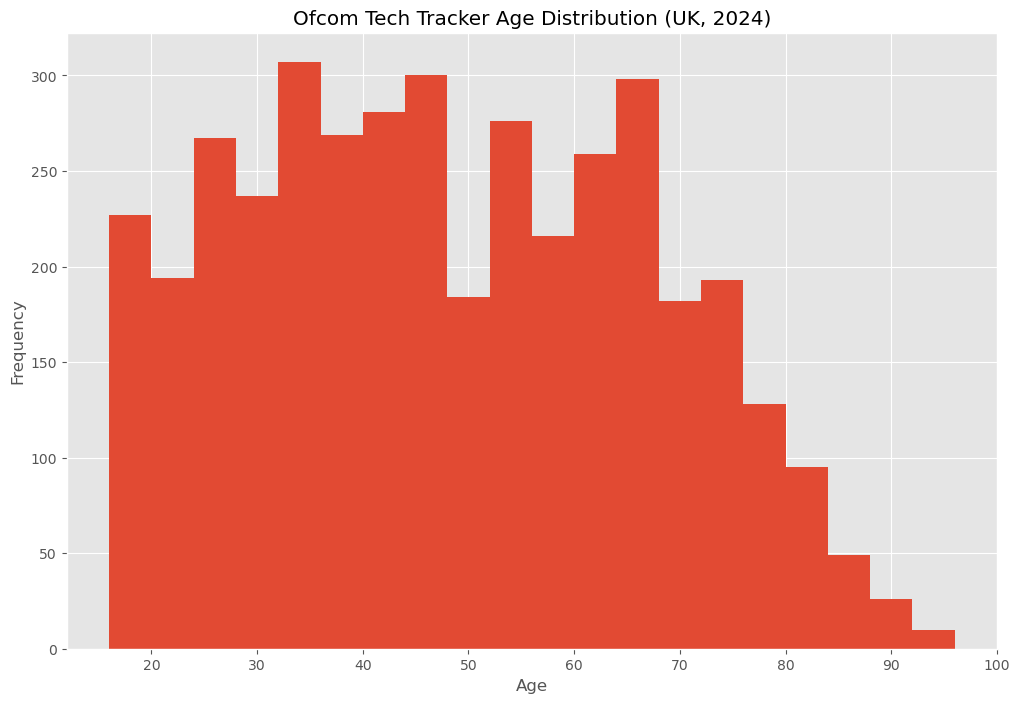

In [15]:
# Plotting a histogram
ax = df_tech['age'] \
    .plot(kind='hist',
          bins=20,
          title="Ofcom Tech Tracker Age Distribution (UK, 2024)",
          figsize=(12,8),
          legend=None)

ax.set_xlabel('Age')
plt.show()

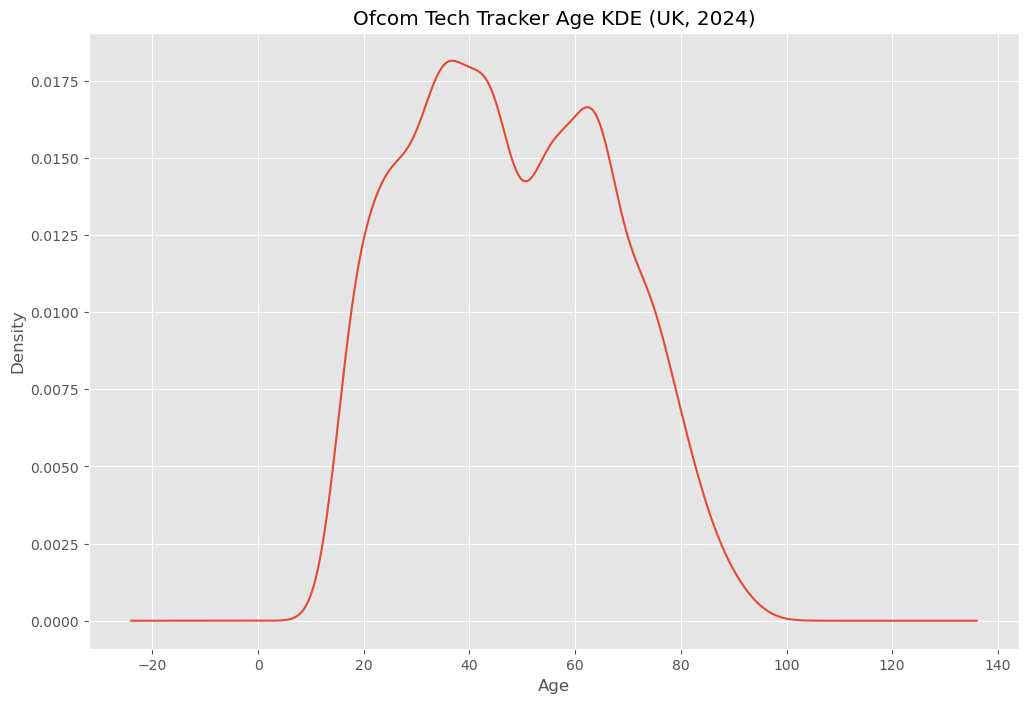

In [16]:
# Plotting kernal density estimation plot
ax = df_tech['age'] \
    .plot(kind='kde',
          title="Ofcom Tech Tracker Age KDE (UK, 2024)",
          figsize=(12,8),
          legend=None)

ax.ticklabel_format(style='plain')
ax.set_xlabel('Age')
plt.show()

There were not many individual's interviewd that were over 90. The outlier at 96 years old could be interesting to look at:

In [17]:
df_tech.query('age == 96')

,WEIGHTNEW,sex,age,age_band,pc_flag,laptop_flag,tablet_flag,console_flag,smart_tv_flag,ipod_flag,kindle_flag,dvd_flag,smart_watch_flag,vr_flag,QD1_none_flag,smart_speaker,smart_doorbell_flag,smart_tracker_flag,smart_scales_flag,smart_baby_flag,smart_lighting_flag,smart_smoke_flag,smart_appliance_flag,smart_robots_flag,smart_plug_flag,smart_fitness_flag,QS8_none_flag,smart_alarm_flag,car,smart_car_flag,smartphone,smartphone_internet,internet_home,internet_work,internet_school,internet_library,internet_learning_centre,internet_cafe,internet_other_home,internet_travelling,internet_restaurants,internet_shops,internet_gym,internet_parks,internet_none,internet_hours_per_week
1897,1.543532,2,96.0,10,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4,NaN,1.0,4.0,1,0,0,0,0,0,1,0,0,1,0,0,0,3.0


We can see from the results that she is a women. She has been given a higher weighting, hence women that age must be under represented in the sample compared to the UK population. She has a smartphone that she uses, tablet, smart TV, smart speaker, smart smoke alarm. She doesn't own a car. She doesn't know how or if she accesses the internet on her phone. She uses the internet at home, in shops, and in other people's houses. She uses the internet around 8-14 hours per week. Let's compare this to the youngest participant who is 16.

In [18]:
df_tech.query('age == 16').shape

(50, 46)

There are 50 participants who are 16, so we will just select the first one from our dataset for a quick comparison against the 96 year old.

In [19]:
df_tech.query('age == 16').head(1)

,WEIGHTNEW,sex,age,age_band,pc_flag,laptop_flag,tablet_flag,console_flag,smart_tv_flag,ipod_flag,kindle_flag,dvd_flag,smart_watch_flag,vr_flag,QD1_none_flag,smart_speaker,smart_doorbell_flag,smart_tracker_flag,smart_scales_flag,smart_baby_flag,smart_lighting_flag,smart_smoke_flag,smart_appliance_flag,smart_robots_flag,smart_plug_flag,smart_fitness_flag,QS8_none_flag,smart_alarm_flag,car,smart_car_flag,smartphone,smartphone_internet,internet_home,internet_work,internet_school,internet_library,internet_learning_centre,internet_cafe,internet_other_home,internet_travelling,internet_restaurants,internet_shops,internet_gym,internet_parks,internet_none,internet_hours_per_week
82,1.88086,2,16.0,2,1,1,1,1,1,0,1,0,1,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,2,1.0,1.0,1.0,1,1,1,1,0,0,1,1,1,1,0,1,0,3.0


<table><tr>
<td><a href='https://www.pexels.com/photo/photo-of-woman-showing-her-cellphone-to-her-grandmother-3768140/'><img src="img/young_old.jpg" alt="Young girl and old woman using smartphone"/></a></td>
</tr></table>

From the result we see she is also a girl with a high weighting. Part of her demographics must also be under represented in the sample. There is already a big difference compared to the 96 year old, as the 16 year old has much more technology. She has a PC, laptop, tablet, games console, smart TV, Kindle, smart watch, smart speaker, smart doorbell, and smart tracker (i.e. Air Tags). She uses a car as a passenger. The car has a smart infotainment system. She also has a smartphone with a 5G internet connection. She uses the internet at home, work, school, library, other people's homes, while travelling, in cafes, bars, restaurants, shops, parks. However, she states she also only uses the internet 8-14 hours per week.

However, these are just 2 entries! We have 4000 to analyse. Let's look at more of the data together to draw some real insights!

# 5. Feature Relationships👫

Firstly, we need to change some of the columns to flags so it will be easier to count device owners. We can that make a graph of the percentage of device owners across the UK.

Several questions give the participants the option to say they are a device user, or a device owner. We will flag both of these as 1. If they say 'No' or 'Don't Know' then we will convert that to 0.

Here's the code:

In [20]:
df_tech['smart_speaker'] = np.where(df_tech['smart_speaker'].isin([1, 2]), 1, 0)
df_tech['car'] = np.where(df_tech['car'].isin([1, 2]), 1, 0)
df_tech['smartphone'] = np.where(df_tech['smartphone'].isin([1, 2]), 1, 0)
df_tech['smartphone_internet'] = np.where(df_tech['smartphone_internet'].isin([1, 2]), 1, 0)
df_tech['internet_home'] = np.where(df_tech['internet_home'].isin([1, 2]), 1, 0)

In [21]:
df_tech.head()

,WEIGHTNEW,sex,age,age_band,pc_flag,laptop_flag,tablet_flag,console_flag,smart_tv_flag,ipod_flag,kindle_flag,dvd_flag,smart_watch_flag,vr_flag,QD1_none_flag,smart_speaker,smart_doorbell_flag,smart_tracker_flag,smart_scales_flag,smart_baby_flag,smart_lighting_flag,smart_smoke_flag,smart_appliance_flag,smart_robots_flag,smart_plug_flag,smart_fitness_flag,QS8_none_flag,smart_alarm_flag,car,smart_car_flag,smartphone,smartphone_internet,internet_home,internet_work,internet_school,internet_library,internet_learning_centre,internet_cafe,internet_other_home,internet_travelling,internet_restaurants,internet_shops,internet_gym,internet_parks,internet_none,internet_hours_per_week
0,0.710594,2,44.0,5,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,5.0
1,0.664539,1,46.0,6,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,3.0
2,0.657413,2,47.0,6,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,8.0
3,1.972197,2,49.0,6,1,1,1,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,7.0
4,0.864400,2,58.0,7,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1,1,1,1,0,1,0,1,1,1,1,1,1,0,0,2.0


In [22]:
# Columns that are not device flags
exclude = ['WEIGHTNEW', 'sex', 'age', 'age_band', 'QD1_none_flag', 'QS8_none_flag', 'car']

# Identify columns dynamically
device_columns = [col for col in df_tech.columns if col not in exclude and 'internet' not in col]

# Format column names nicer for graph
device_names = ['PC', 'Laptop', 'Tablet', 'Games Console', 'Smart TV', 'iPod', 'Kindle', 'DVD Player', 'Smart Watch', 'VR', 
                'Smart Speaker','Smart Doorbell','Air Tags','Smart Scales', 'Smart Baby Monitor','Smart Lighting','Smart Smoke Alarm','Smart Appliance',
                'Smart Robot', 'Smart Plug','Smart Fitness','Smart Security System','Smart Car Infotainment', 'Smartphone']

We can define a function to make a table for us. This means we can reuse it for analysing the internet use columns.

In [23]:
def createTable(columns,labels): 
    # Apply the weight to the device flags
    weighted_flags = df_tech[columns].multiply(df_tech['WEIGHTNEW'], axis=0)

    # Calculate percentages using vectorized operations
    percent = (weighted_flags.sum(axis=0) / df_tech.shape[0]) * 100

    # Combine into a single DataFrame
    df_output = pd.DataFrame({
    'Labels': labels,
    'Percentage': percent.values
    })

    # Sort by device name for better readability
    df_output = df_output.sort_values(by='Percentage', ascending=False).reset_index(drop=True)

    print(df_output)
    return df_output

In [24]:
# Use our function
df_devices = createTable(device_columns,device_names)

                    Labels  Percentage
0               Smartphone   93.168870
1                 Smart TV   75.888313
2                   Laptop   71.580582
3                   Tablet   61.727444
4            Smart Speaker   41.215504
5            Games Console   38.270441
6                       PC   34.439992
7              Smart Watch   34.192779
8               DVD Player   26.724886
9           Smart Doorbell   22.200606
10  Smart Car Infotainment   18.891946
11                  Kindle   18.255032
12                    iPod   14.135692
13       Smart Smoke Alarm   11.687554
14           Smart Fitness    8.733846
15             Smart Robot    7.137990
16                      VR    6.216886
17                Air Tags    5.586298
18      Smart Baby Monitor    3.968143
19            Smart Scales    3.901263
20              Smart Plug    2.835480
21         Smart Appliance    2.493978
22          Smart Lighting    2.148816
23   Smart Security System    1.222884


Now we have a dataframe that shows us the most owned ubicomp devices in the UK in descending order. Because we have applied the weighting, we can assume that these figures are representative of the whole UK. Let's see what this looks like on a graph.

While DVD players are not usually smart devices, I have left it in the graph just to show how popular some older technology still is.

Again we can write a function to create our plot quicker next time:

In [25]:
def createBarH(df):

    ax = df.plot(kind='barh',
            x='Labels',
            y='Percentage',
            figsize=(12, 8),
            legend=None)

    # Add percentage data labels at the end of each bar, formatted to 0 decimal places
    for i in range(len(df)):
        percentage = df['Percentage'].iloc[i]
        ax.text(percentage + 1, i, f'{percentage:.0f}%', va='center')  # Format to 0 decimal places
    return ax

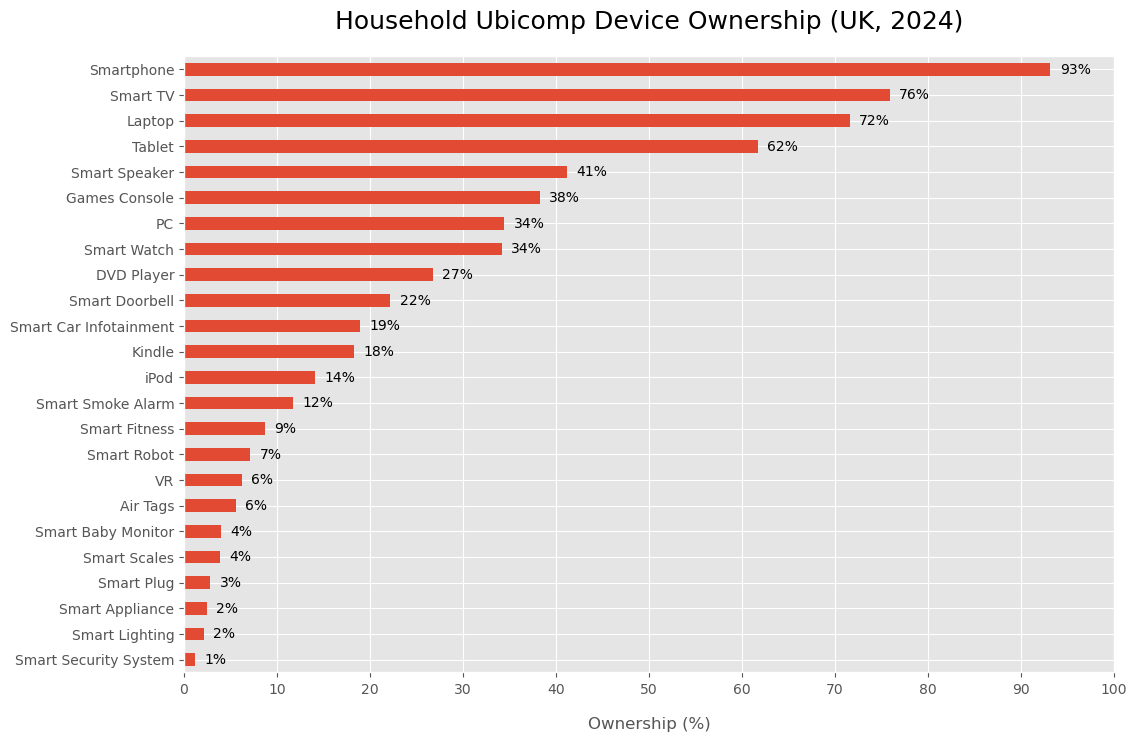

In [26]:
# Use our function
createBarH(df_devices)

plt.title('Household Ubicomp Device Ownership (UK, 2024)', pad=20, fontsize=18)  # Increase 'pad' for more space
plt.xticks(range(0, 101, 10))
plt.gca().invert_yaxis()  # Reverse the x-axis
plt.xlabel('Ownership (%)', labelpad=15)
plt.ylabel(None)
plt.show()

Some interesting insights here. It may seem obvious that the smartphone is the most common ubicomp device. However, I find it interesting that households are more likely to have a smart tv than a laptop. Also, only around 1 third of the UK has a PC now. It looks like they are being replaced by smaller devices - tablets and laptops.

<table><tr>
<td><a href='https://unsplash.com/photos/person-holding-silver-aluminum-case-apple-watch-JE3ASpuEld4'><img src="img/smart_watch.jpg" alt="Apple Watch"/></a></td>
</tr></table>

The evolution of ubicomp can really be seen with 1 third of the UK now owning a smart watch. Now people don't even need to take their phone out of their pocket to read a text or check Google Maps. While various other smart technologies look under-adopted, remember 2% of the UK population is still 1.2m people. 1.2m times more people have smart lighting than Sir Charles Darwin predticed would have a computer, just 78 years ago.

While these devices are based in the household, let's look at the data on smartphone mobile data access, as this can be used anywhere. We will also look at locations where the UK population use the internet most.

In [27]:
# Columns that are not internet use flags but have the word internet in them
exclude = ['internet_hours_per_week','internet_none']

# Identify columns dynamically
location_columns = [col for col in df_tech.columns if 'internet' in col and col not in exclude]

# Format column names nicer for graph
location_names = ['Smartphone Mobile Data', 'Home', 'Work','School/University',
                  'Library','Internet Learning Centre','Internet Cafe',"At Other's Homes",
                  'While Travelling (Train etc.)', 'Cafes/Restaurants/Bars','Shops','Gyms',
                  'Parks']

In [28]:
# Use our function
df_internet = createTable(location_columns,location_names)

                           Labels  Percentage
0                            Home   94.141736
1          Smartphone Mobile Data   84.392919
2   While Travelling (Train etc.)   44.807691
3                At Other's Homes   42.819560
4                            Work   40.511469
5          Cafes/Restaurants/Bars   38.277917
6                           Shops   36.779594
7                           Parks   27.139104
8                            Gyms   21.913670
9               School/University   10.980114
10                        Library    9.835977
11                  Internet Cafe    8.253808
12       Internet Learning Centre    2.907289


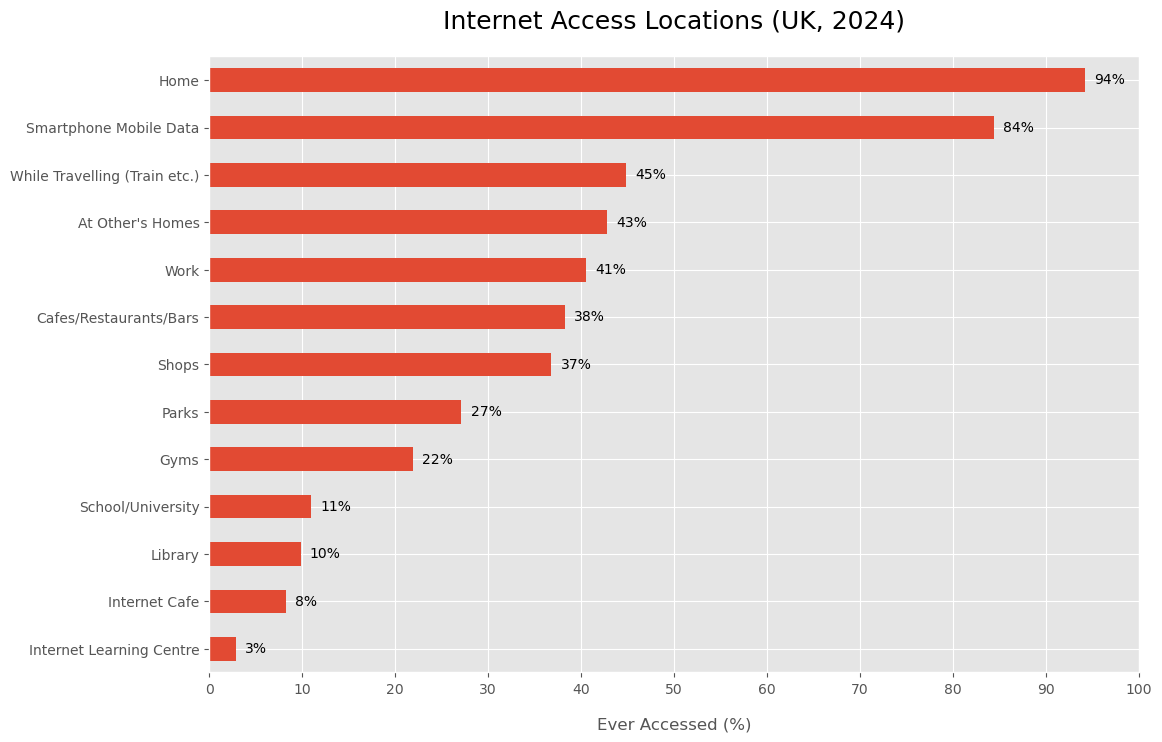

In [29]:
# Use our function
createBarH(df_internet)

plt.title('Internet Access Locations (UK, 2024)', pad=20, fontsize=18)  # Increase 'pad' for more space
plt.xticks(range(0, 101, 10))
plt.gca().invert_yaxis()  # Reverse the x-axis
plt.xlabel('Ever Accessed (%)',labelpad=15)
plt.ylabel(None)
plt.show()

This graph really shows us the power of mobile data's contribution to ubicomp. 84% of the UK have access to 4G or 5G mobile data on a smartphone. This allows them to access the internet from any location. We can see that while usage at home is the most popular, almost half of the population access the internet while travelling or at other people's homes. They could also be accessing the internet from another device in these locations, due to the way the questionnaire was structured.

Now let's look at how often people are spending their time on the internet.

In [30]:
# Convert the Series to a DataFrame
df_hours = df_tech['internet_hours_per_week'].value_counts().reset_index()

# Rename the columns
df_hours.columns = ['Labels', 'Percentage']

# Define bands
conditions = [
    (df_hours['Labels'] == 1),  # Condition 1: Label is 1
    (df_hours['Labels'] == 2),  # Condition 2: Label is 2, etc.
    (df_hours['Labels'] == 3), 
    (df_hours['Labels'] == 4),
    (df_hours['Labels'] == 5),
    (df_hours['Labels'] == 6), 
    (df_hours['Labels'] == 7),
    (df_hours['Labels'] == 8),
    (df_hours['Labels'] == 9)
]

# Define corresponding results for each condition
choices = ['None', 'Up to 7', '8 to 14','15 to 22','23 to 29','30 to 39',
           '40 to 49','Over 50',"Unsure"]

# Apply np.select() to the 'Labels' column based on the conditions
df_hours['Labels'] = np.select(conditions, choices, default=df_hours['Labels'])

df_hours['Percentage'] = df_hours['Percentage'] / df_hours['Percentage'].sum() * 100

df_hours['Labels'] = pd.Categorical(df_hours['Labels'], categories=choices, ordered=True)
df_hours = df_hours.sort_values('Labels')

# Check the result
print(df_hours)

     Labels  Percentage
8      None    1.142705
1   Up to 7   14.669147
2   8 to 14   14.297103
3  15 to 22   12.888653
5  23 to 29   10.550093
4  30 to 39   11.453627
6  40 to 49    9.194791
0   Over 50   21.126761
7    Unsure    4.677119


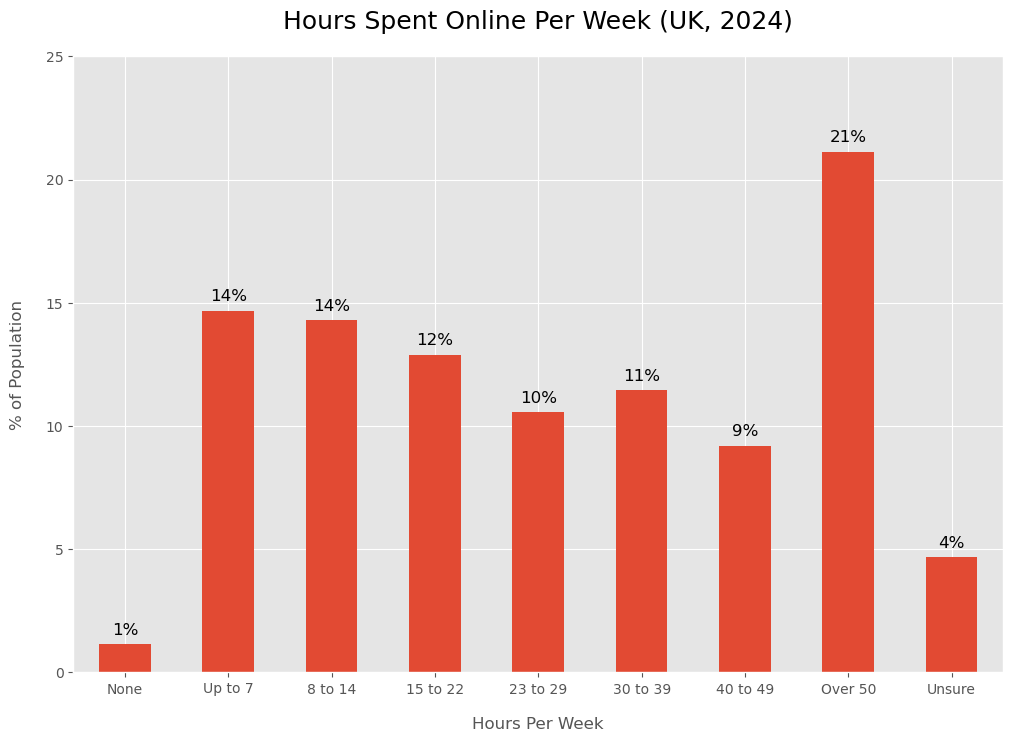

In [31]:
ax = df_hours.plot(kind='bar',
        x='Labels',
        y='Percentage',
        figsize=(12, 8),
        legend=None)

ax.bar_label(ax.containers[0], fmt='%d%%', fontsize=12, padding=5)

plt.title('Hours Spent Online Per Week (UK, 2024)', pad=20, fontsize=18)  # Increase 'pad' for more space
plt.ylabel("% of Population", labelpad=15)
plt.xlabel('Hours Per Week',labelpad=15)
plt.xticks(rotation=0)
plt.yticks(range(0, 26, 5))
plt.show()

Almost a third (30%) of the UK spends 40 hours or more per week on the internet. Mark Weiser's description of ubicomp in 1988 resonates - an "environment in which each person is continually interacting with hundreds of nearby wirelessly interconnceted computers." People now have the potential to connect wirelessly and share information with billions of smartphone users almost instantly ([source](https://www.businessofapps.com/data/instagram-statistics/)). They have this access at home but also at work, while travelling, and at cafes. They are spending the length of a full work week utilising this access.

# 6. Asking questions about our Data🤷‍♂️

- Trying to answer some questions about our data using a plot or statistics

It may be interesting to investigate the demographics of the 7% of the UK population who do not use or own a smartphone. We can query our dataset to only analyse this cohort.

<table><tr>
<td><a href='https://unsplash.com/photos/an-old-fashioned-rotary-telephone-sits-on-a-table-MFwqL9MtyN0'><img src="img/landline.jpg" alt="Old rotary phone on a table"/></a></td>
</tr></table>

In [32]:
df_tech.loc[(df_tech['smartphone'] == 0)].shape

(290, 46)

This consists of 290 people. Let's see if we can draw any insights from their gender or age. We hypothesise that it will be an older demographic. As women tend to live longer than men, the data may skew towards female as well.

- What is the sex distribution?
- What is the age distribution?

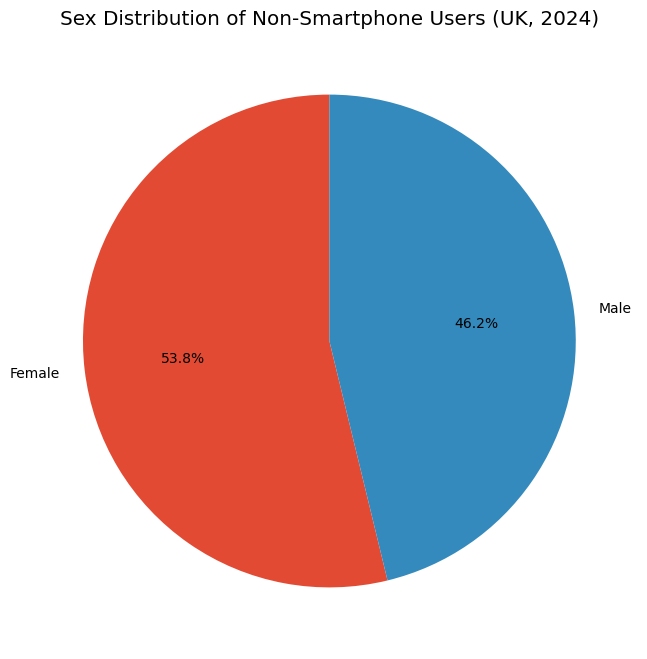

In [33]:
# Plot a pie chart
ax = df_tech.loc[(df_tech['smartphone'] == 0)]['sex'].value_counts() \
    .plot(kind='pie',
          figsize=(12, 8),
          autopct='%1.1f%%',  # Add percentages to the pie slices
          startangle=90,      # Rotate the start angle
          labels=['Female', 'Male'],
          title='Sex Distribution of Non-Smartphone Users (UK, 2024)')

plt.ylabel(None)
plt.show()

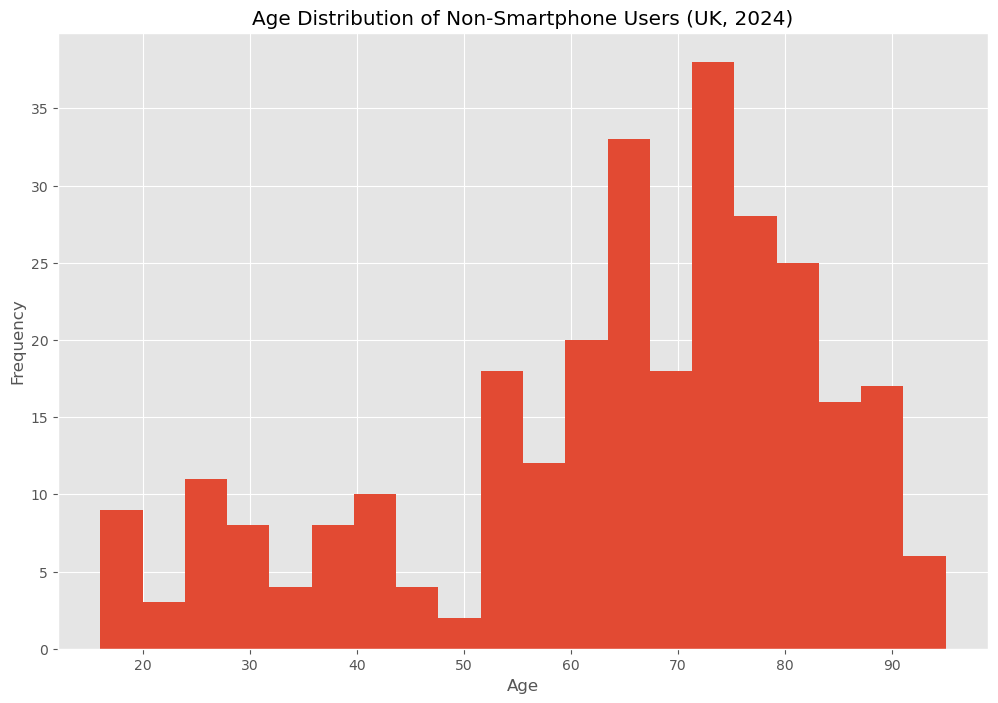

In [34]:
# Plotting a histogram
ax = df_tech.loc[(df_tech['smartphone'] == 0)]['age'] \
    .plot(kind='hist',
          bins=20,
          title="Age Distribution of Non-Smartphone Users (UK, 2024)",
          figsize=(12,8),
          legend=None)

ax.set_xlabel('Age')
plt.show()

We can see here that our predictons were correct. More non-smartphone users are over 50 and a slightly higher percentage are female.

# Conclusion👋

That's all for now! Thanks for following along.

To summarise, we read in our data and got an initial feel for how it was structured and its quality. Then we performed some validation checks and cleaning to prepare it for our analysis. We then performed univariate analysis, looking at the distribution of age. We then moved on to deeper analysis, plotting the percentage of device owners, internet access locations, and hours spent online. We then answered some questions about users who opt-out of a ubicomp environment in some way by not using a smartphone.

There was a clear demonstration that Sir Charles Darwin was severely wrong in his prediction of one computer being sufficient for an entire country. We showed there is a mass adoption of smart technology of varying kinds, from watches to robots. This technology, as Marc Weiser states in his defination of ubicomp, connects wirelessly and creates an invisible, interconnected environment for the user. The population of the UK accesses the internet on these devices in multiple locations, indoors and outdoors, and the majority utilise this capability over 23 hours per week.

<b>Ubiquitous Comuting is indeed UBIQUITOUS.</b>

However, not all participate in this new environment. We discovered it tends to be the older population that have less adoption than a younger demographic. Is this because they are not used to living with technology? Or maybe due to their age they may lack comprehension, which could reveal an ease of use issue. These are questions for further research.

<i>Contains data from Ofcom re-used with their permission ([source](https://www.ofcom.org.uk/about-ofcom/our-website/copyright/)).</i>

<i>"Unless indicated as Crown-owned material or otherwise, the material featured on this website or provided in hard copy may be reproduced free of charge in any format or medium, provided that it is reproduced accurately and not used in a misleading context. The material must be acknowledged as Ofcom copyright and the title of the document/publication specified."</i>